# **TASK-2**

**Develop the ML model(s) to predict the credit risk(low or high) for a given applicant.** 

**Business Constraint:** Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.

**Provide the answers for the below points:**

1. Explain your intuition behind the features used for modeling.
2. Are you creating new derived features? If yes explain the intuition behind them.
3. Are there missing values? If yes how you plan to handle it.
4. How categorical features are handled for modeling.
5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.
6. Do you plan to drop the correlated feature? If yes then how.
7. Which ML algorithm you plan to use for modeling.
8. **Train two (at least) ML models** to predict the credit risk & provide the confusion matrix for each model.
9. How you will select the hyperparameters for models trained in above step.
10. Which metric(s) you will choose to select between the set of models.
11. Explain how you will export the trained models & deploy it for prediction in production.

In [177]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [178]:
# fetch file which we download in task-1
dataset = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Reunion\Pre_processed_data\dataframe.csv")

In [179]:
dataset.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Years_at_current_residence,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),...,EMP_STATUS_unskilled - resident,P_building society savings agreement/life insurance,P_car or other,P_none,P_real estate,LOAN_HIST_all loans at this bank paid back duly,LOAN_HIST_critical/pending loans at other banks,LOAN_HIST_delay in paying off loans in the past,LOAN_HIST_existing loans paid back duly till now,LOAN_HIST_no loans taken/all loans paid back duly
0,67,1,1,4,4,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,22,0,1,2,2,3,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
2,49,1,2,3,3,4,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,45,1,2,4,3,4,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,53,1,2,4,2,3,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [180]:
dataset.size

45000

In [181]:
dataset.columns

Index(['Primary_applicant_age_in_years', 'Gender', 'Number_of_dependents',
       'Years_at_current_residence', 'Has_been_employed_for_at_least',
       'Has_been_employed_for_at_most', 'Foreign_worker',
       'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant',
       'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
       'high_risk_applicant', 'H_for free', 'H_own', 'H_rent', 'P_FF&E',
       'P_business', 'P_career development', 'P_domestic appliances',
       'P_education', 'P_electronic equipment', 'P_new vehicle',
       'P_repair costs', 'P_used vehicle', 'OTHR_EMI_PLANS_bank',
       'OTHR_EMI_PLANS_none', 'OTHR_EMI_PLANS_stores',
       'EMP_STATUS_management / self-employed / highly qualified employee / officer',
       'EMP_STATUS

In [182]:
dataset.isnull().sum()

Primary_applicant_age_in_years                                                 0
Gender                                                                         0
Number_of_dependents                                                           0
Years_at_current_residence                                                     0
Has_been_employed_for_at_least                                                 0
Has_been_employed_for_at_most                                                  0
Foreign_worker                                                                 0
Savings_account_balance                                                        0
Balance_in_existing_bank_account_(lower_limit_of_bucket)                       0
Balance_in_existing_bank_account_(upper_limit_of_bucket)                       0
Months_loan_taken_for                                                          0
Principal_loan_amount                                                          0
EMI_rate_in_percentage_of_di

# Conclusion
Here we had seen that there isn't any null value and object value in our pre-processed data. thus we are ready with our model building part but before model building part we have to do data normalization on our whole dataset.

# --------------------------------------------------------------------------------------------------------------

## 1.1 Data Normalization (scaling)

In [183]:
# Split df into X and y
X = dataset.drop('high_risk_applicant', axis=1).copy()
y = dataset['high_risk_applicant'].copy()

In [184]:
# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [185]:
X.head()

,Primary_applicant_age_in_years,Gender,Number_of_dependents,Years_at_current_residence,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),...,EMP_STATUS_unskilled - resident,P_building society savings agreement/life insurance,P_car or other,P_none,P_real estate,LOAN_HIST_all loans at this bank paid back duly,LOAN_HIST_critical/pending loans at other banks,LOAN_HIST_delay in paying off loans in the past,LOAN_HIST_existing loans paid back duly till now,LOAN_HIST_no loans taken/all loans paid back duly
0,2.766456,0.670280,-0.428290,1.046987,1.338078,-1.464049,0.196014,-1.231393,-0.653831,0.226218,...,-0.5,-0.549621,-0.704987,-0.426653,1.595650,-0.226991,1.553374,-0.31063,-1.061913,-0.204124
1,-1.191404,-1.491914,-0.428290,-0.765977,-0.317959,0.608696,0.196014,-0.196609,1.001437,1.429505,...,-0.5,-0.549621,-0.704987,-0.426653,1.595650,-0.226991,-0.643760,-0.31063,0.941697,-0.204124
2,1.183312,0.670280,2.334869,0.140505,0.510060,1.299611,0.196014,-0.196609,-0.653831,-0.977069,...,2.0,-0.549621,-0.704987,-0.426653,1.595650,-0.226991,1.553374,-0.31063,-1.061913,-0.204124
3,0.831502,0.670280,2.334869,1.046987,0.510060,1.299611,0.196014,-0.196609,-0.653831,0.226218,...,-0.5,1.819435,-0.704987,-0.426653,-0.626704,-0.226991,-0.643760,-0.31063,0.941697,-0.204124
4,1.535122,0.670280,2.334869,1.046987,-0.317959,0.608696,0.196014,-0.196609,-0.653831,0.226218,...,-0.5,-0.549621,-0.704987,2.343823,-0.626704,-0.226991,-0.643760,3.21926,-1.061913,-0.204124


In [186]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: high_risk_applicant, Length: 1000, dtype: int64

# 1.2 Split Data.

In [187]:
def train_test_split_func(X, y):
    # Train-test split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=37)
    
    X_train, X_other, y_train, y_other = train_test_split(X, y, 
                                                      test_size=0.30, 
                                                      random_state=5)


    X_valid, X_test, y_valid, y_test = train_test_split(X_other, 
                                                        y_other,
                                                  test_size=0.66, 
                                                  random_state=5)

    return X_train, X_test, X_valid, y_train, y_test, y_valid

In [188]:
X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_split_func(X, y)

In [189]:
print('Train features sample size:', X_train.shape[0])
print('Train target sample size:', y_train.shape[0])
print()
print('Validation features sample size:', X_valid.shape[0])
print('Validation target sample size:', y_valid.shape[0])
print()
print('Test features sample size:', X_test.shape[0])
print('Test target sample size:', y_test.shape[0])
print()
print('Train features sample size, %:', round(len(X_train) / len(X) * 100), '%')
print('Valid features sample size, %:', round(len(X_valid) / len(X) * 100), '%')
print('Test features sample size, %:', round(len(X_test) / len(X) * 100), '%')
print()
print('Train target sample size, %:', round(len(y_train) / len(y) * 100), '%')
print('Valid target sample size, %:', round(len(y_valid) / len(y) * 100), '%')
print('Test target sample size, %:', round(len(y_test) / len(y) * 100), '%')

Train features sample size: 700
Train target sample size: 700

Validation features sample size: 102
Validation target sample size: 102

Test features sample size: 198
Test target sample size: 198

Train features sample size, %: 70 %
Valid features sample size, %: 10 %
Test features sample size, %: 20 %

Train target sample size, %: 70 %
Valid target sample size, %: 10 %
Test target sample size, %: 20 %


### ***Conclusion***: We have normalized, augmented and split the initial dataset into train (70%), validation (10%) and test (20%) samples, and thus ready to train the ML model.

The subsamples are the following:
- X_train 70%
- y_train 70%

- X_valid 10%
- y_valid 10%

- X_test 20%
- y_test 20%

## 1.3 Tackling the disbalance

In [190]:
y_train_df = pd.DataFrame(y_train)

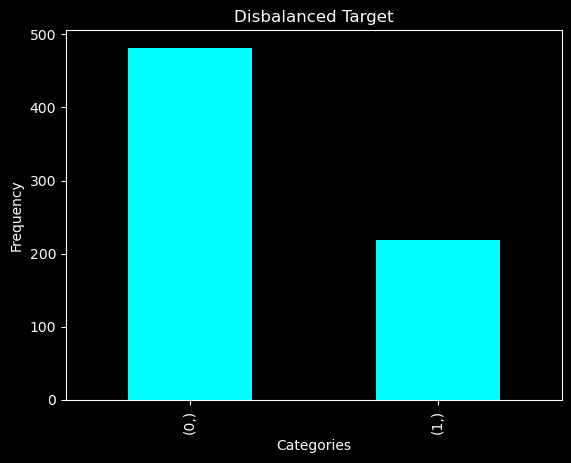

In [191]:
y_train_df.value_counts().plot(kind='bar', color=['cyan'])

plt.title('Disbalanced Target')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show();

In [192]:
y_test_df = pd.DataFrame(y_test)

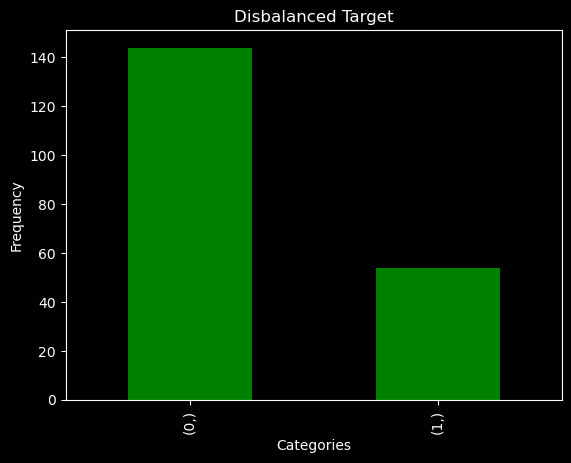

In [193]:
y_test_df.value_counts().plot(kind='bar', color=['green'])

plt.title('Disbalanced Target')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show();

### ***Conclusion***: As long as the test data is quite well balanced, we keep it as is.

# ---------------------------------------------------------------------------------------------------------------

In [194]:
def evaluate_model(model, X_test, y_test, classification_threshold=0.5):
    
    y_true = np.array(y_test)
    
    y_pred = (model.predict_proba(X_test) >= classification_threshold).astype(np.int)
    y_pred = list(map(lambda x: x[1], y_pred))

    
    print("Test Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))
    
    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred, target_names=["Not Risky", "Risky"])
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(np.arange(2) + 0.5, ["Low Risk", "High Risk"])
    plt.yticks(np.arange(2) + 0.5, ["Low Risk", "High Risk"])
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

# 2. Model Building

# Logistic Regression Model
#### penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
  - Specify the norm of the penalty:

None: no penalty is added;
'l2': add a L2 penalty term and it is the default choice;
'l1': add a L1 penalty term;
'elasticnet': both L1 and L2 penalty terms are added.

#### tol : float, default=1e-4
  - Tolerance for stopping criteria.

#### C : float, default=1.0
  - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

#### fit_intercept : bool, default=True
  - Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

#### intercept_scaling : float, default=1
  - Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.

#### class_weight : dict or ‘balanced’, default=None
  - Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

  - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).


#### random_state : int, RandomState instance, default=None
  - Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. See Glossary for details.

  - solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
  - Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

  - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

  - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

  - ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.
 

#### max_iter : int, default=100
  - Maximum number of iterations taken for the solvers to converge.

  - multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
  - If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.


#### verbose : int, default=0
  - For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.

#### warm_start : bool, default=False
  - When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver. See the Glossary.

#### n_jobs : int, default=None
  - Number of CPU cores used when parallelizing over classes if multi_class=’ovr’

#### l1_ratio : float, default=None
  - The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

In [195]:
model = LogisticRegression(
    class_weight={
        0: 1,
        1: 1.5
    },
    verbose = 50,
    tol = 1,
    l1_ratio = 0.1,
    fit_intercept = True,
    max_iter = 100,
    multi_class = 'multinomial',
    n_jobs = 1,
    penalty = 'l2',
    random_state = 1,
    solver = 'newton-cg',
)

model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(class_weight={0: 1, 1: 1.5}, l1_ratio=0.1,
                   multi_class='multinomial', n_jobs=1, random_state=1,
                   solver='newton-cg', tol=1, verbose=50)

In [196]:
model.score(X_test, y_test)

0.7525252525252525

##  Testing the Logistic Regression Model

### 1.1 Making predictions

### 1.2 Confusion Matrix

#### Let's find the overall accuracy of the model using 
Accuracy = TP+TN/TP+TN+FP+FN

*   cm[0][0] = TP
*   cm[1][1] = TN
*   cm[0][1] = FP
*   cm[1][0] = FN

### 1.3 Classification Report

Precision - the precision tells us what percentage of the prediction was correct. 
TP = True positive
FP = False positive
precision = TP/TP+FP

Recall - sensitivity or hit rate tell us the fraction of correctly identified positive prediction.
recall = TP/TP+FN

F1-score - measures precision and recall at the same time by finding the harmonic mean of the two values.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Accuracy - The accuracy measures the accuracy of all predictions (positive and negative).
Accuracy = TP+TN/TP+TN+FP+FN

Test Accuracy: 75.25%


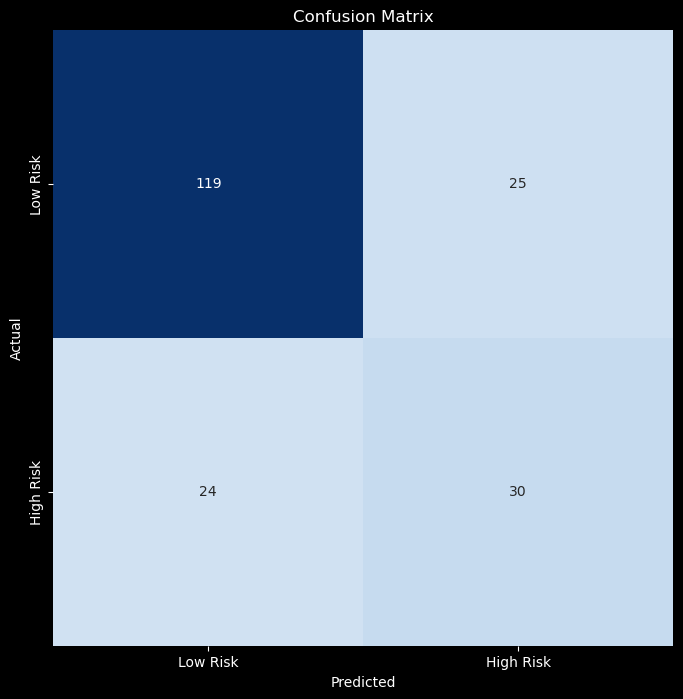

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Risky       0.83      0.83      0.83       144
       Risky       0.55      0.56      0.55        54

    accuracy                           0.75       198
   macro avg       0.69      0.69      0.69       198
weighted avg       0.75      0.75      0.75       198



In [197]:
evaluate_model(model, X_test, y_test, classification_threshold=0.5)

# Random Forest Classifier Model

link : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Paramerter's

n_estimators: int, default=100
  - The number of trees in the forest.

criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”
  - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation. Note: This parameter is tree-specific.

max_depth : int, default=None
  - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_weight_fraction_leaf : float, default=0.0
  - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_features : {“sqrt”, “log2”, None}, int or float, default=”sqrt”
  - The number of features to consider when looking for the best split: If int, then consider max_features features at each split. If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split. If “auto”, then max_features=sqrt(n_features). If “sqrt”, then max_features=sqrt(n_features). If “log2”, then max_features=log2(n_features). If None, then max_features=n_features.

random_state : int, RandomState instance or None, default=None
  - Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). See Glossary for details.

warm_start: bool, default=False
  - When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. See Glossary and Fitting additional weak-learners for details.

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

# creating a RF classifier
Random_forest_classifier_model = RandomForestClassifier(
    n_estimators = 200,
    criterion = 'entropy',
    max_depth = 10,
    min_samples_split = 5,
    max_features = 'log2',
)  
  
Random_forest_classifier_model.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = Random_forest_classifier_model.predict(X_test)
   
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7777777777777778


##  Testing the Random Forest Classifier Model

Test Accuracy: 77.78%


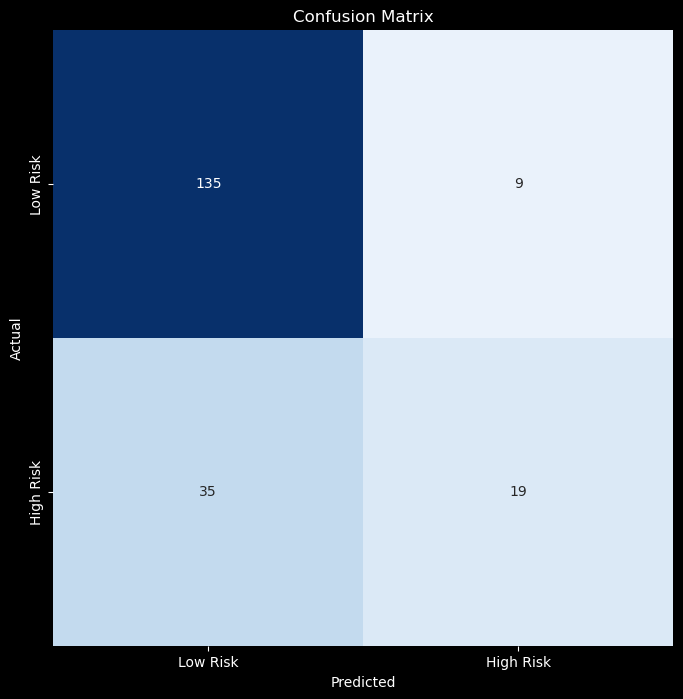

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Risky       0.79      0.94      0.86       144
       Risky       0.68      0.35      0.46        54

    accuracy                           0.78       198
   macro avg       0.74      0.64      0.66       198
weighted avg       0.76      0.78      0.75       198



In [199]:
evaluate_model(Random_forest_classifier_model, X_test, y_test, classification_threshold=0.5)

# --------------------------------------------------------------------------------------------------------------

# Support Vector Machine Model 

link : - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Parameter
C : float, default=1.0
  - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
  - Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degree : int, default=3
  - Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

gamma : {‘scale’, ‘auto’} or float, default=’scale’
  - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, if ‘auto’, uses 1 / n_features if float, must be non-negative.

coef : 0 ,float, default=0.0
  - Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

probability : bool, default=False
  - Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the User Guide.

In [200]:
from sklearn import svm

In [207]:
svm_model = svm.SVC(
    kernel='linear', 
    C=1, 
    gamma= 'auto',
    probability = True
)

In [208]:
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear', probability=True)

# Testing the Support-Vector-Machine Model

Test Accuracy: 77.27%


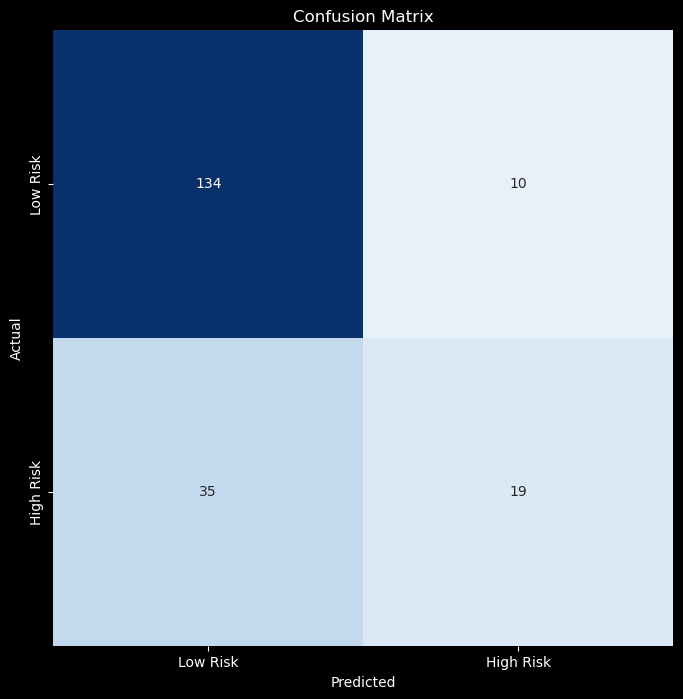

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Risky       0.79      0.93      0.86       144
       Risky       0.66      0.35      0.46        54

    accuracy                           0.77       198
   macro avg       0.72      0.64      0.66       198
weighted avg       0.76      0.77      0.75       198



In [209]:
evaluate_model(svm_model, X_test, y_test, classification_threshold=0.5)

# ---------------------------------------------------------------------------------------------------------------

# Decision tree model

### Parameters:
criterion : {“gini”, “entropy”, “log_loss”}, default=”gini”
  - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

splitter : {“best”, “random”}, default=”best”
  - The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int, default=None
  - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
  
min_samples_leaf : int or float, default=1
  - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. 
  - If int, then consider min_samples_leaf as the minimum number. 
  - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [214]:
from sklearn.tree import DecisionTreeClassifier

In [215]:
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [216]:
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [217]:
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

# Testing the Decision Tree Model

Test Accuracy: 70.71%


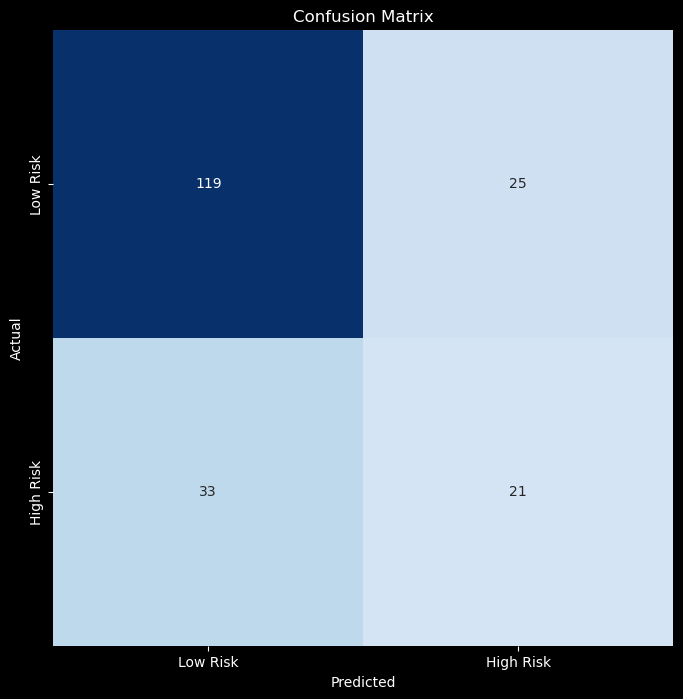

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Risky       0.78      0.83      0.80       144
       Risky       0.46      0.39      0.42        54

    accuracy                           0.71       198
   macro avg       0.62      0.61      0.61       198
weighted avg       0.69      0.71      0.70       198



In [218]:
evaluate_model(clf_gini, X_test, y_test, classification_threshold=0.5)

Test Accuracy: 73.23%


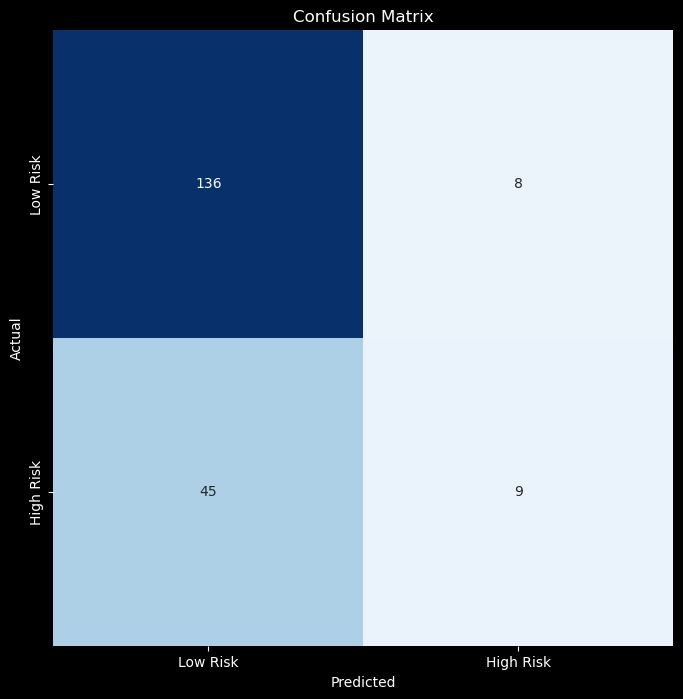

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Risky       0.75      0.94      0.84       144
       Risky       0.53      0.17      0.25        54

    accuracy                           0.73       198
   macro avg       0.64      0.56      0.55       198
weighted avg       0.69      0.73      0.68       198



In [219]:
evaluate_model(clf_entropy, X_test, y_test, classification_threshold=0.5)